In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
# Load Image
def load_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
# Edge-Based Segmentation (Canny Edge Detection)
def edge_based_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    return edges

In [ ]:
# Region-Based Segmentation (Thresholding)
def region_based_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    _, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    return binary

In [ ]:
# Hough Transform - Line Detection
def hough_line_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray, 50, 150)
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=10)
    result = image.copy()
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return result

In [ ]:
# Hough Transform - Circle Detection
def hough_circle_detection(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=30, param1=50, param2=30, minRadius=10, maxRadius=30)
    result = image.copy()
    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(result, (i[0], i[1]), i[2], (0, 255, 0), 2)
    return result

In [ ]:
# Display Images
def display_results(original, edge, region, line, circle):
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    axs[0].imshow(original)
    axs[0].set_title("Original")
    axs[1].imshow(edge, cmap='gray')
    axs[1].set_title("Edge-Based Segmentation")
    axs[2].imshow(region, cmap='gray')
    axs[2].set_title("Region-Based Segmentation")
    axs[3].imshow(line)
    axs[3].set_title("Hough Line Detection")
    axs[4].imshow(circle)
    axs[4].set_title("Hough Circle Detection")
    plt.show()

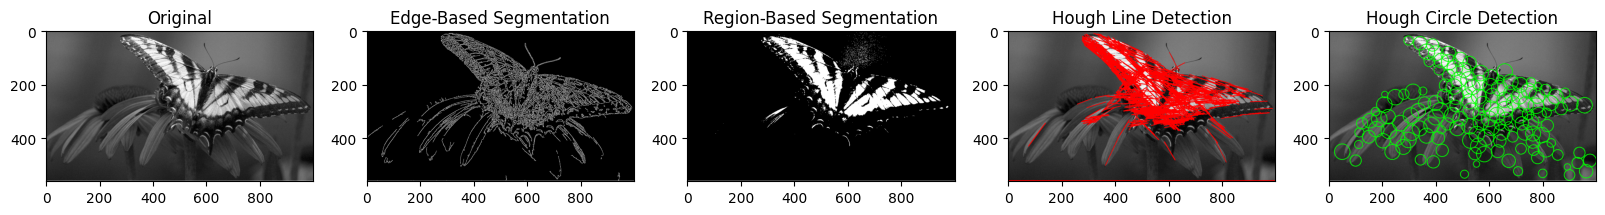

In [ ]:
# Example Usage
image_path = "WhatsApp Image 2025-02-11 at 08.46.36_2380bef9.jpg"
image = load_image(image_path)
edge_seg = edge_based_segmentation(image)
region_seg = region_based_segmentation(image)
hough_lines = hough_line_detection(image)
hough_circles = hough_circle_detection(image)

display_results(image, edge_seg, region_seg, hough_lines, hough_circles)

In [ ]:
!pip install ultralytics

In [ ]:
import torch
import torchvision
import cv2
import numpy as np
from ultralytics import YOLO
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F

In [ ]:
# Load YOLOv5 model
yolo_model = YOLO('yolov5s.pt')


PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



In [ ]:
def detect_objects_yolo(image_path):
    results = yolo_model(image_path)  # Get the list of results
    for result in results:  # Iterate over results
        result.show()  # Display image with detections

In [ ]:
from google.colab.patches import cv2_imshow
def detect_objects_rcnn(image_path):
    # Load Faster R-CNN model
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_tensor = F.to_tensor(image).unsqueeze(0)

    # Perform object detection
    with torch.no_grad():
        predictions = model(image_tensor)

    # Draw bounding boxes
    for idx, box in enumerate(predictions[0]['boxes']):
        score = predictions[0]['scores'][idx].item()
        if score > 0.5:
            x1, y1, x2, y2 = map(int, box.tolist())
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            label = f"{predictions[0]['labels'][idx].item()} ({score:.2f})"
            cv2.putText(image, label, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Show result
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


image 1/1 /content/WhatsApp Image 2025-02-11 at 08.46.36_2380bef9.jpg: 384x640 1 umbrella, 1 potted plant, 13.6ms
Speed: 3.0ms preprocess, 13.6ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


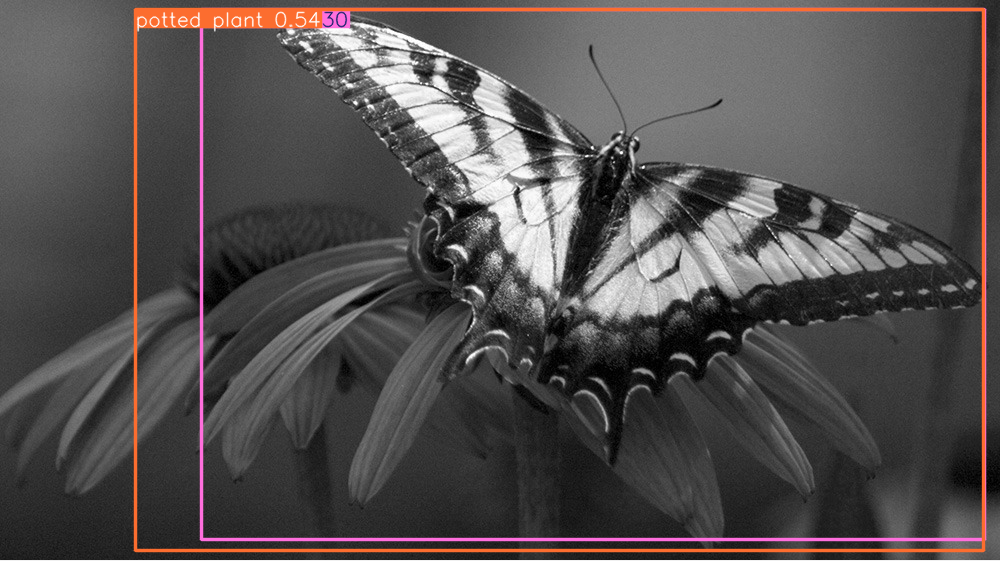

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


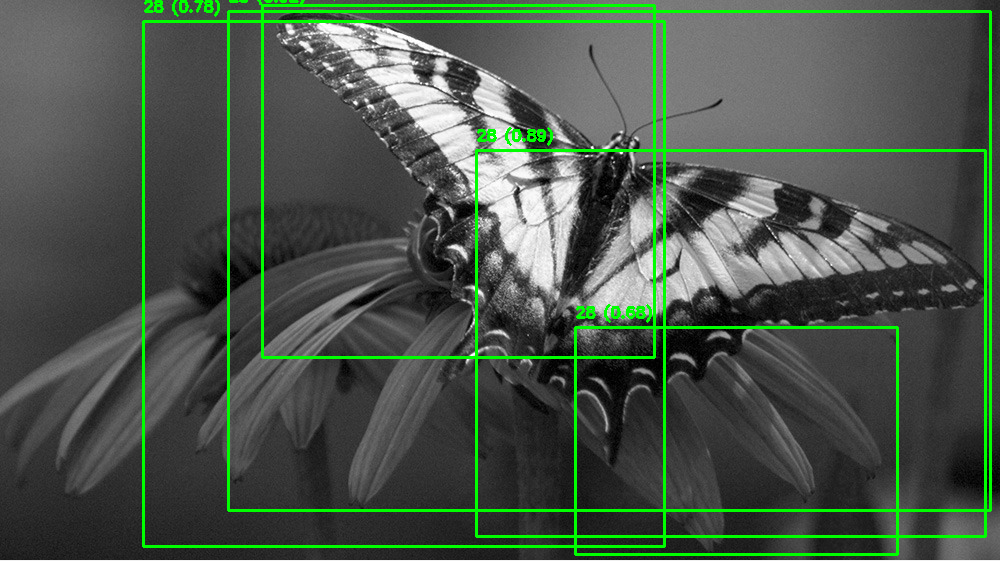

In [ ]:
# Example usage
image_path = '/content/WhatsApp Image 2025-02-11 at 08.46.36_2380bef9.jpg'  # Replace with your image path
detect_objects_yolo(image_path)
detect_objects_rcnn(image_path)